In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

dataset = pd.read_csv("data.csv",encoding = 'ISO-8859-1')


dataset['Description'].fillna("Other gifts", inplace=True)


#Drop duplicates from the dataset
dataset.drop_duplicates(inplace=True)

# check missing values for each column 
print(dataset.isnull().sum().sort_values(ascending=False))
#dropping null value
dataset= dataset.dropna(how = 'any', axis = 'rows')

#change columns tyoe - String to Int type 
dataset['CustomerID'] = dataset['CustomerID'].astype('int64')


dataset["Total_Price"]= dataset['Quantity'] * dataset['UnitPrice']
# creating a dict file  
countrydict = {'Austria': 1,'Belgium': 2,'Bahrain': 3,'Brazil': 4,'Canada': 5 ,'Channel Islands': 6,'Cyprus': 7,'Czech Republic':8,'Denmark': 9,'EIRE': 10,
'European Community': 11,'Finland': 12,'France': 13,'Germany': 14,'Greece': 15,'Hong Kong': 16,'Iceland': 17,'Israel': 18,'Italy': 19,'Japan': 20
,'Lebanon': 21,'Lithuania': 22,'Malta': 23,'Netherlands': 24,'Norway': 25,'Poland': 26,'Portugal': 27,'RSA': 28,'Saudi Arabia': 29,'Singapore': 30,'Spain': 31
,'Sweden': 32,'Switzerland': 33,'United Arab Emirates': 34,'United Kingdom': 35,'Unspecified': 36,'USA': 37,'Australia':38} 
  

dataset["CountryCode"] = [countrydict[item] for item in dataset.Country] 


#dataset.to_csv("othersgift123.csv")
#401604 

print(dataset.info())
dataset.head(6)
 


CustomerID     135037
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
Description         0
StockCode           0
InvoiceNo           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null object
UnitPrice      401604 non-null float64
CustomerID     401604 non-null int64
Country        401604 non-null object
Total_Price    401604 non-null float64
CountryCode    401604 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 33.7+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,CountryCode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,35
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,35
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30,35


In [2]:
tempData = dataset.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
tempData[ : 5]
##temp
tempData['canceled_orders'] = tempData['InvoiceNo'].apply(lambda x: int('C' in x))
##temp
tempData = tempData.rename(columns = {'InvoiceDate':'No of products'})
##temp
tempData[ : 5]

num_of_canceled_orders = tempData['canceled_orders'].sum()
total_orders = tempData.shape[0] 
print("TotalNumber of cancelled orders",num_of_canceled_orders)
print("Total number of orders",total_orders)
print('Percent of cancelled orders: {:.2f}% '.format(num_of_canceled_orders/total_orders * 100))

TotalNumber of cancelled orders 3654
Total number of orders 22190
Percent of cancelled orders: 16.47% 


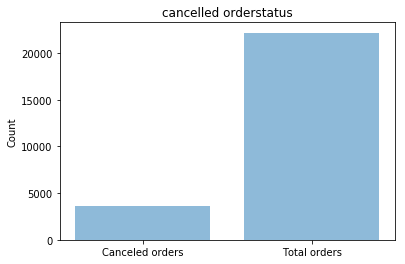

In [3]:
orderstatus = ('Canceled orders','Total orders')
y_pos = np.arange(len(orderstatus))
numbers = [num_of_canceled_orders,total_orders]
plt.bar(y_pos, numbers, align='center', alpha=0.5)
plt.xticks(y_pos, orderstatus)
plt.ylabel('Count')
plt.title("cancelled orderstatus")
plt.show()

In [4]:
tempData.head(10)

,CustomerID,InvoiceNo,No of products,canceled_orders
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0
5,12347,556201,18,0
6,12347,562032,22,0
7,12347,573511,47,0
8,12347,581180,11,0
9,12348,539318,17,0


In [5]:
## deleting cancelled orders from dataset as it will not required for further analysis
dataset_test_index= dataset[dataset.InvoiceNo.str.match('^[a-zA-Z]')].index

dataset.drop(dataset_test_index, axis=0, inplace=True)
totalproduct_sold = dataset["Quantity"].sum().round(2)
print("Total product sold till date is ", totalproduct_sold)

#Total_revenue
Total_revenue= dataset["Total_Price"].sum().round(2)
print("Total Revenue till date is ", Total_revenue)

##avg order value
avgOrder_value= (Total_revenue/total_orders).round(2)
print("Avg order value of dataset is ", avgOrder_value)

##Average basket size = totalproduct sold/ number of order
avg_basketSize= (totalproduct_sold/total_orders).round(2)
print("Avg basket size of dataset is ", avg_basketSize)


Total product sold till date is  5165886
Total Revenue till date is  8887208.89
Avg order value of dataset is  400.51
Avg basket size of dataset is  232.8


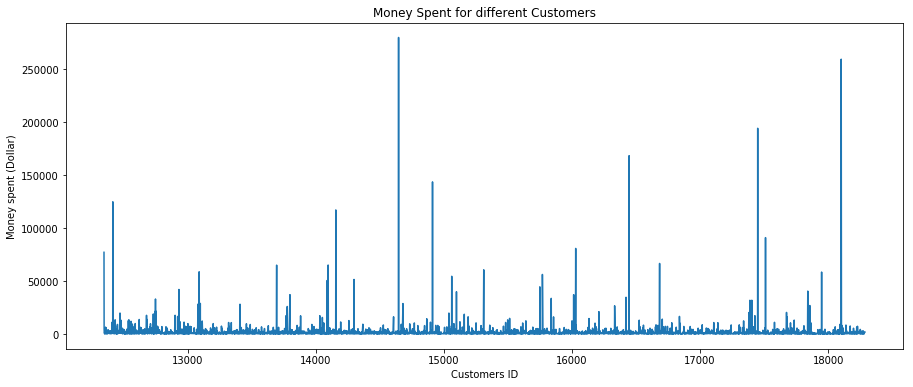

In [6]:
#top 5 customer spender
dataset1= dataset.groupby(by=['CustomerID', 'Country'], as_index=False)["Total_Price"].sum()
dataset1.sort_values(by='Total_Price', ascending=False).head()


plt.subplots(figsize=(15,6))
plt.plot(dataset1.CustomerID, dataset1.Total_Price)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [7]:
#top 5 customer according to order

dataset2= dataset.groupby(by=['CustomerID', 'Country'], as_index=False)["InvoiceNo"].count()
dataset2.sort_values(by='InvoiceNo', ascending=False).head()

#plt.subplots(figsize=(15,6))
#plt.plot(dataset2.CustomerID, dataset2.InvoiceNo)
#plt.xlabel('Customers ID')
#plt.ylabel('Number of Orders')
#plt.title('Number of Orders for different Customers')
#plt.show()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


In [8]:
#orders according to country
dataset3= dataset.groupby(by=['Country'],as_index=False)["InvoiceNo"].count()
dataset3.sort_values(by='InvoiceNo', ascending=False).head()

,Country,InvoiceNo
35,United Kingdom,349227
14,Germany,9027
13,France,8327
10,EIRE,7228
30,Spain,2480


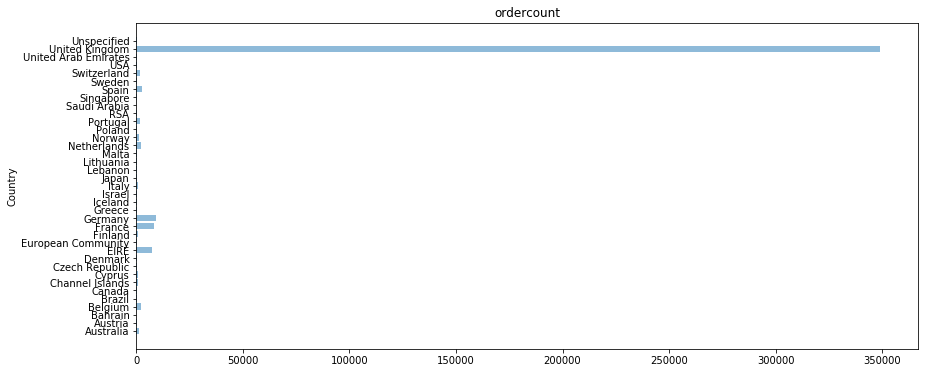

In [9]:
plt.figure(figsize=(14,6))
#plt.title('Distribuition of purchases in the website according to Countries');
#sns.countplot(y='Country', data=dataset3);

#orderstatus = ('Canceled orders','Total orders')
#y_pos = np.arange(len(orderstatus))
numbers = [num_of_canceled_orders,total_orders]
plt.barh(dataset3.Country, dataset3.InvoiceNo, align='center', alpha=0.5)
#plt.xticks(y_pos, orderstatus)
plt.ylabel('Country')
plt.title("ordercount")
plt.show()

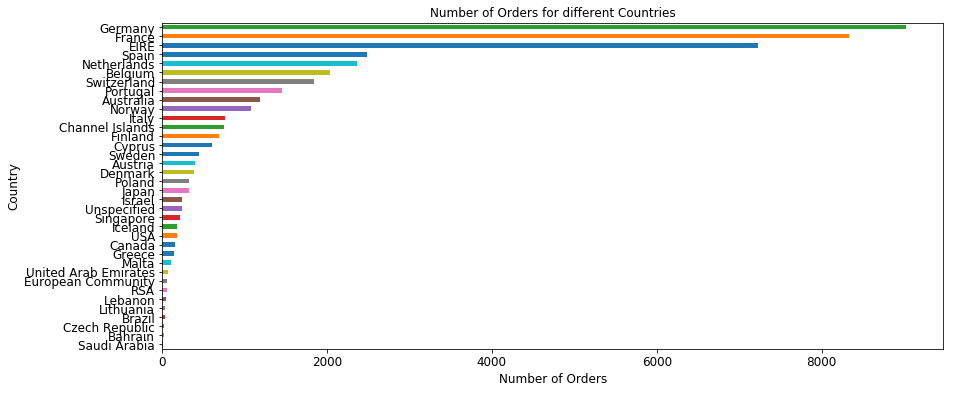

In [10]:
## without UK
dataset3= dataset.groupby('Country')['InvoiceNo'].count().sort_values()
del dataset3['United Kingdom']

plt.figure(figsize=(14,6))

dataset3.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()


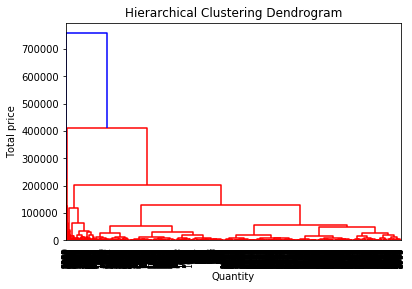

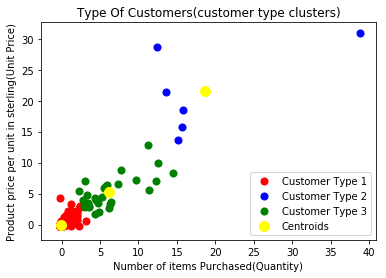

0.9999999999999918
0.006193120268788896


In [11]:
##unsupervised method

dfg = dataset.groupby(by=['CustomerID'])['Quantity','Total_Price'].agg({'Quantity':'sum','Total_Price':'sum'}).reset_index()
dfg.rename(columns={'Quantity':'Total_Quantity','Total_Price' : 'Total_Amount'},inplace=True)
dfg.head(3)

#dfg.describe()



model = linkage(dfg, 'ward')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Quantity')
plt.ylabel('Total price')
dendrogram(model, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

##############################

X = dfg.iloc[:, [1, 2]].values 

# Feature Scaling
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 2, 2], s = 50, c = 'pink', label = 'Customer Type 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()

print(metrics.completeness_score(dfg.Total_Quantity, kmeans.labels_))
print(metrics.homogeneity_score(dfg.Total_Amount, kmeans.labels_))

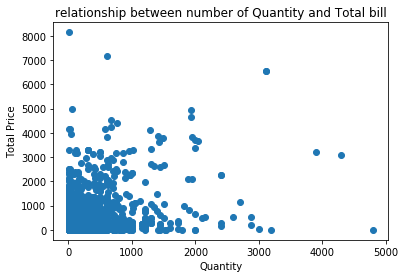

3727.101162059391
-5.231982784297462
-36.0539412239622
-0.15146988664271197


C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: Deprec

In [12]:
#a= dataset1[['Quantity','Total_Price']]

##supervised

dataset_test= dataset[dataset.InvoiceNo.str.match('^[a-zA-Z]')].index

dataset.drop(dataset_test, axis=0, inplace=True)

a= dataset[['Quantity']]
a= a[a.Quantity <6000]
b= dataset[['Total_Price']]
b=b[b.Total_Price< 20000]
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(a,b, test_size=0.30)
X_train.shape
Y_train.shape
lm = LinearRegression()
lm.fit(X_train, Y_train)
lm.fit(a,b)

plt.scatter(a,b)
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.title("relationship between number of Quantity and Total bill" )
plt.show()

predict = lm.predict(X_test)
print(metrics.mean_squared_error(Y_test, predict))
from sklearn.cross_validation import KFold
kfold = KFold(10)
lm = LinearRegression()
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "mean_absolute_error")
print(results.mean())
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "mean_squared_error")
print(results.mean())
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "r2")
print(results.mean())

In [13]:
import sys

print(sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


      Features           Coefficients
0  CountryCode  [-30.914226294855172]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


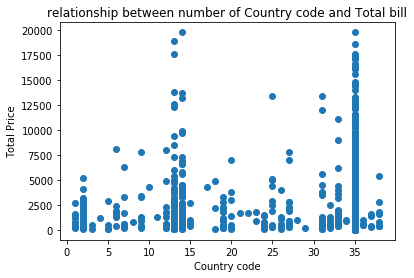

3289989.5827192473
-1602.4048665750724
-3199679.192726514
-2.8684932081496157


C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\dell1\Anaconda3\l

In [14]:

##supervised

dataset_test= dataset[dataset.InvoiceNo.str.match('^[a-zA-Z]')].index

dataset.drop(dataset_test, axis=0, inplace=True)


dfg = dataset.groupby(by=['CustomerID','CountryCode'])['Quantity','Total_Price'].agg({'Quantity':'sum','Total_Price':'sum'}).reset_index()
dfg.rename(columns={'Quantity':'Total_Quantity','Total_Price' : 'Total_Price'},inplace=True)
dfg.head(3)


dfg= dfg.loc[dfg['Total_Price'] < 20000]

a= dfg[['CountryCode']]


b= dfg[['Total_Price']]


#del dataset['United Kingdom']
#b=b[b.Total_Price< 75000]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(a,b, test_size=0.25)

lm = LinearRegression()
lm.fit(X_train, Y_train)
lm.fit(a,b)


pd.DataFrame(list(zip(a.columns, lm.coef_)), columns = ['Features', 'Coefficients'])
print(pd.DataFrame(list(zip(a.columns, lm.coef_)), columns = ['Features', 'Coefficients']))
print(lm.fit(a, b))


plt.scatter(a,b)
plt.xlabel("Country code")
plt.ylabel("Total Price")
plt.title("relationship between number of Country code and Total bill" )
plt.show()

predict = lm.predict(X_test)
print(metrics.mean_squared_error(Y_test, predict))
from sklearn.cross_validation import KFold
kfold = KFold(5)
lm = LinearRegression()
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "mean_absolute_error")
print(results.mean())
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "mean_squared_error")
print(results.mean())
results = sklearn.cross_validation.cross_val_score(lm, a, b, cv = kfold, scoring = "r2")
print(results.mean())